# Clean

In [ ]:
import pandas as pd

perturb_list = ["base", "perturb1", "perturb2"]
model_list = ["1PL", "2PL","3PL"]
for perturb in perturb_list:
    for model in model_list:
        file_path = f'model_coef/divided_{perturb}_coef_{model}.csv'
        df = pd.read_csv(file_path)

        # delete column
        df = df.iloc[:, 1:-2]

        new_columns = ['a1', 'd', 'g', 'u']
        data = {col: [] for col in new_columns}
        for i in range(0, len(df.columns), 4):
            for col, new_col in zip(df.columns[i:i+4], new_columns):
                data[new_col].append(df[col].values[0])

        new_df = pd.DataFrame(data)
        new_df.to_csv(f'model_coef/divided_{perturb}_coef_{model}_clean.csv', index=False)

# Visualize

1PL


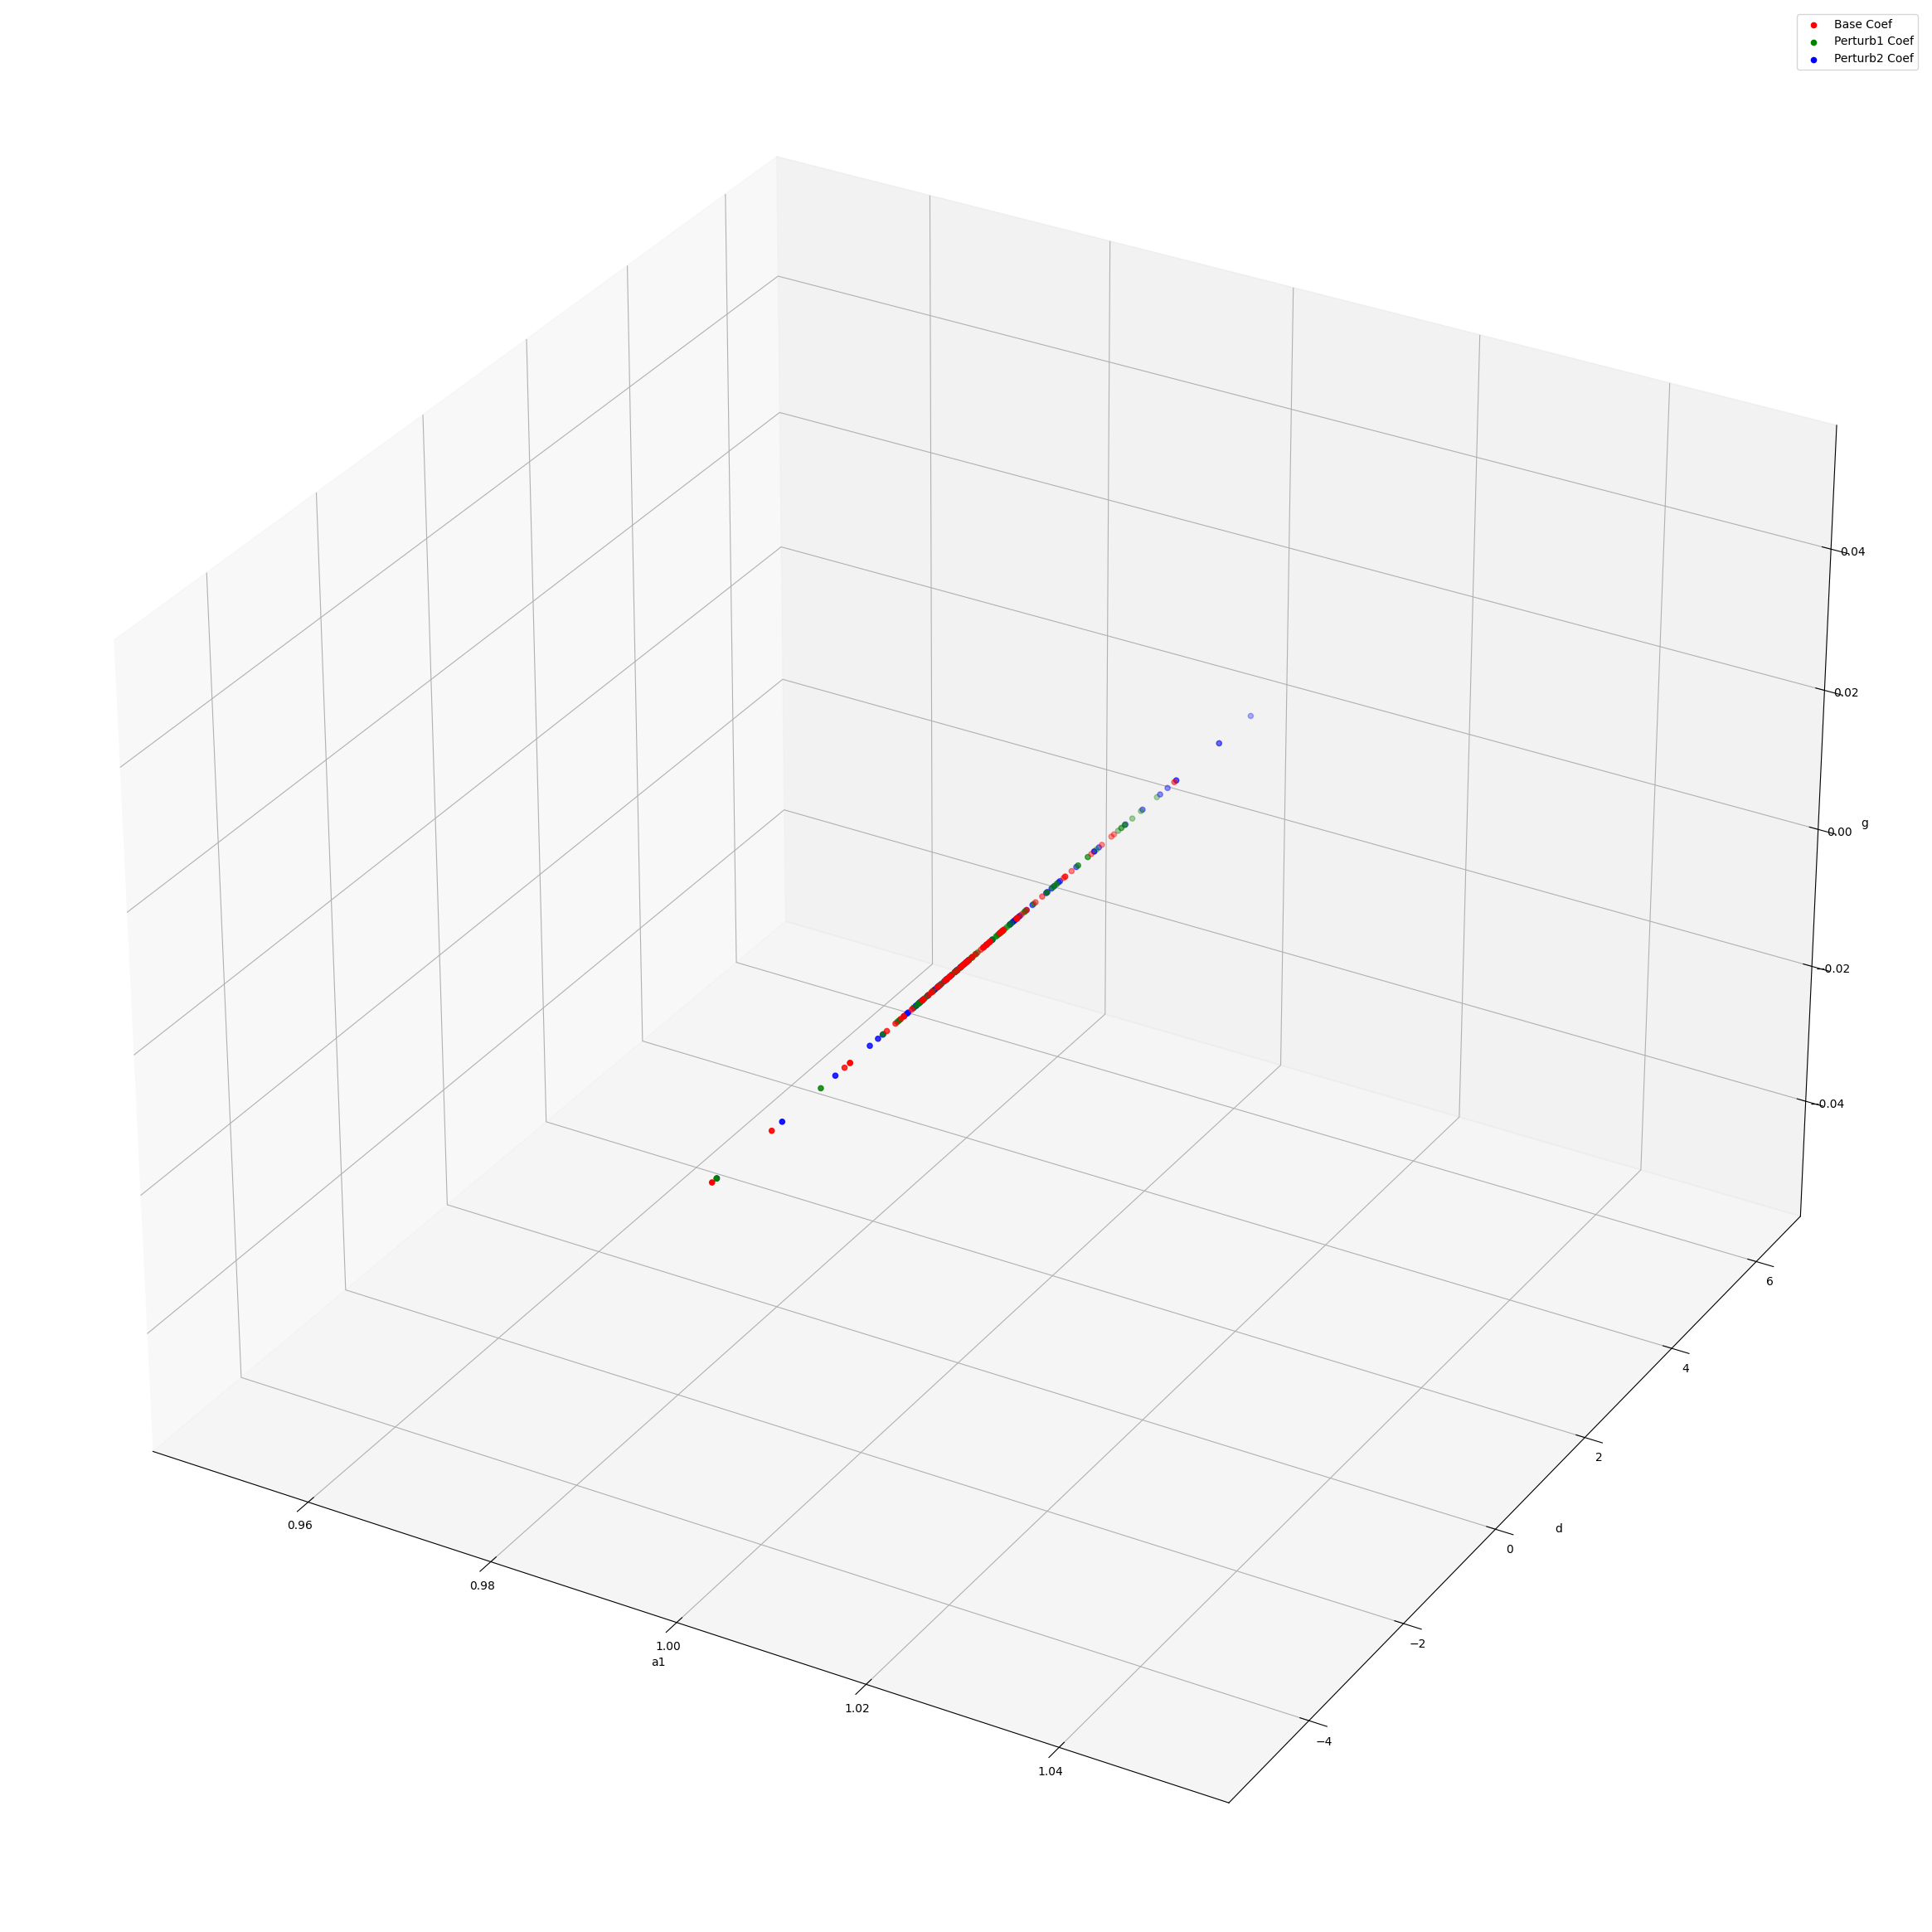

2PL


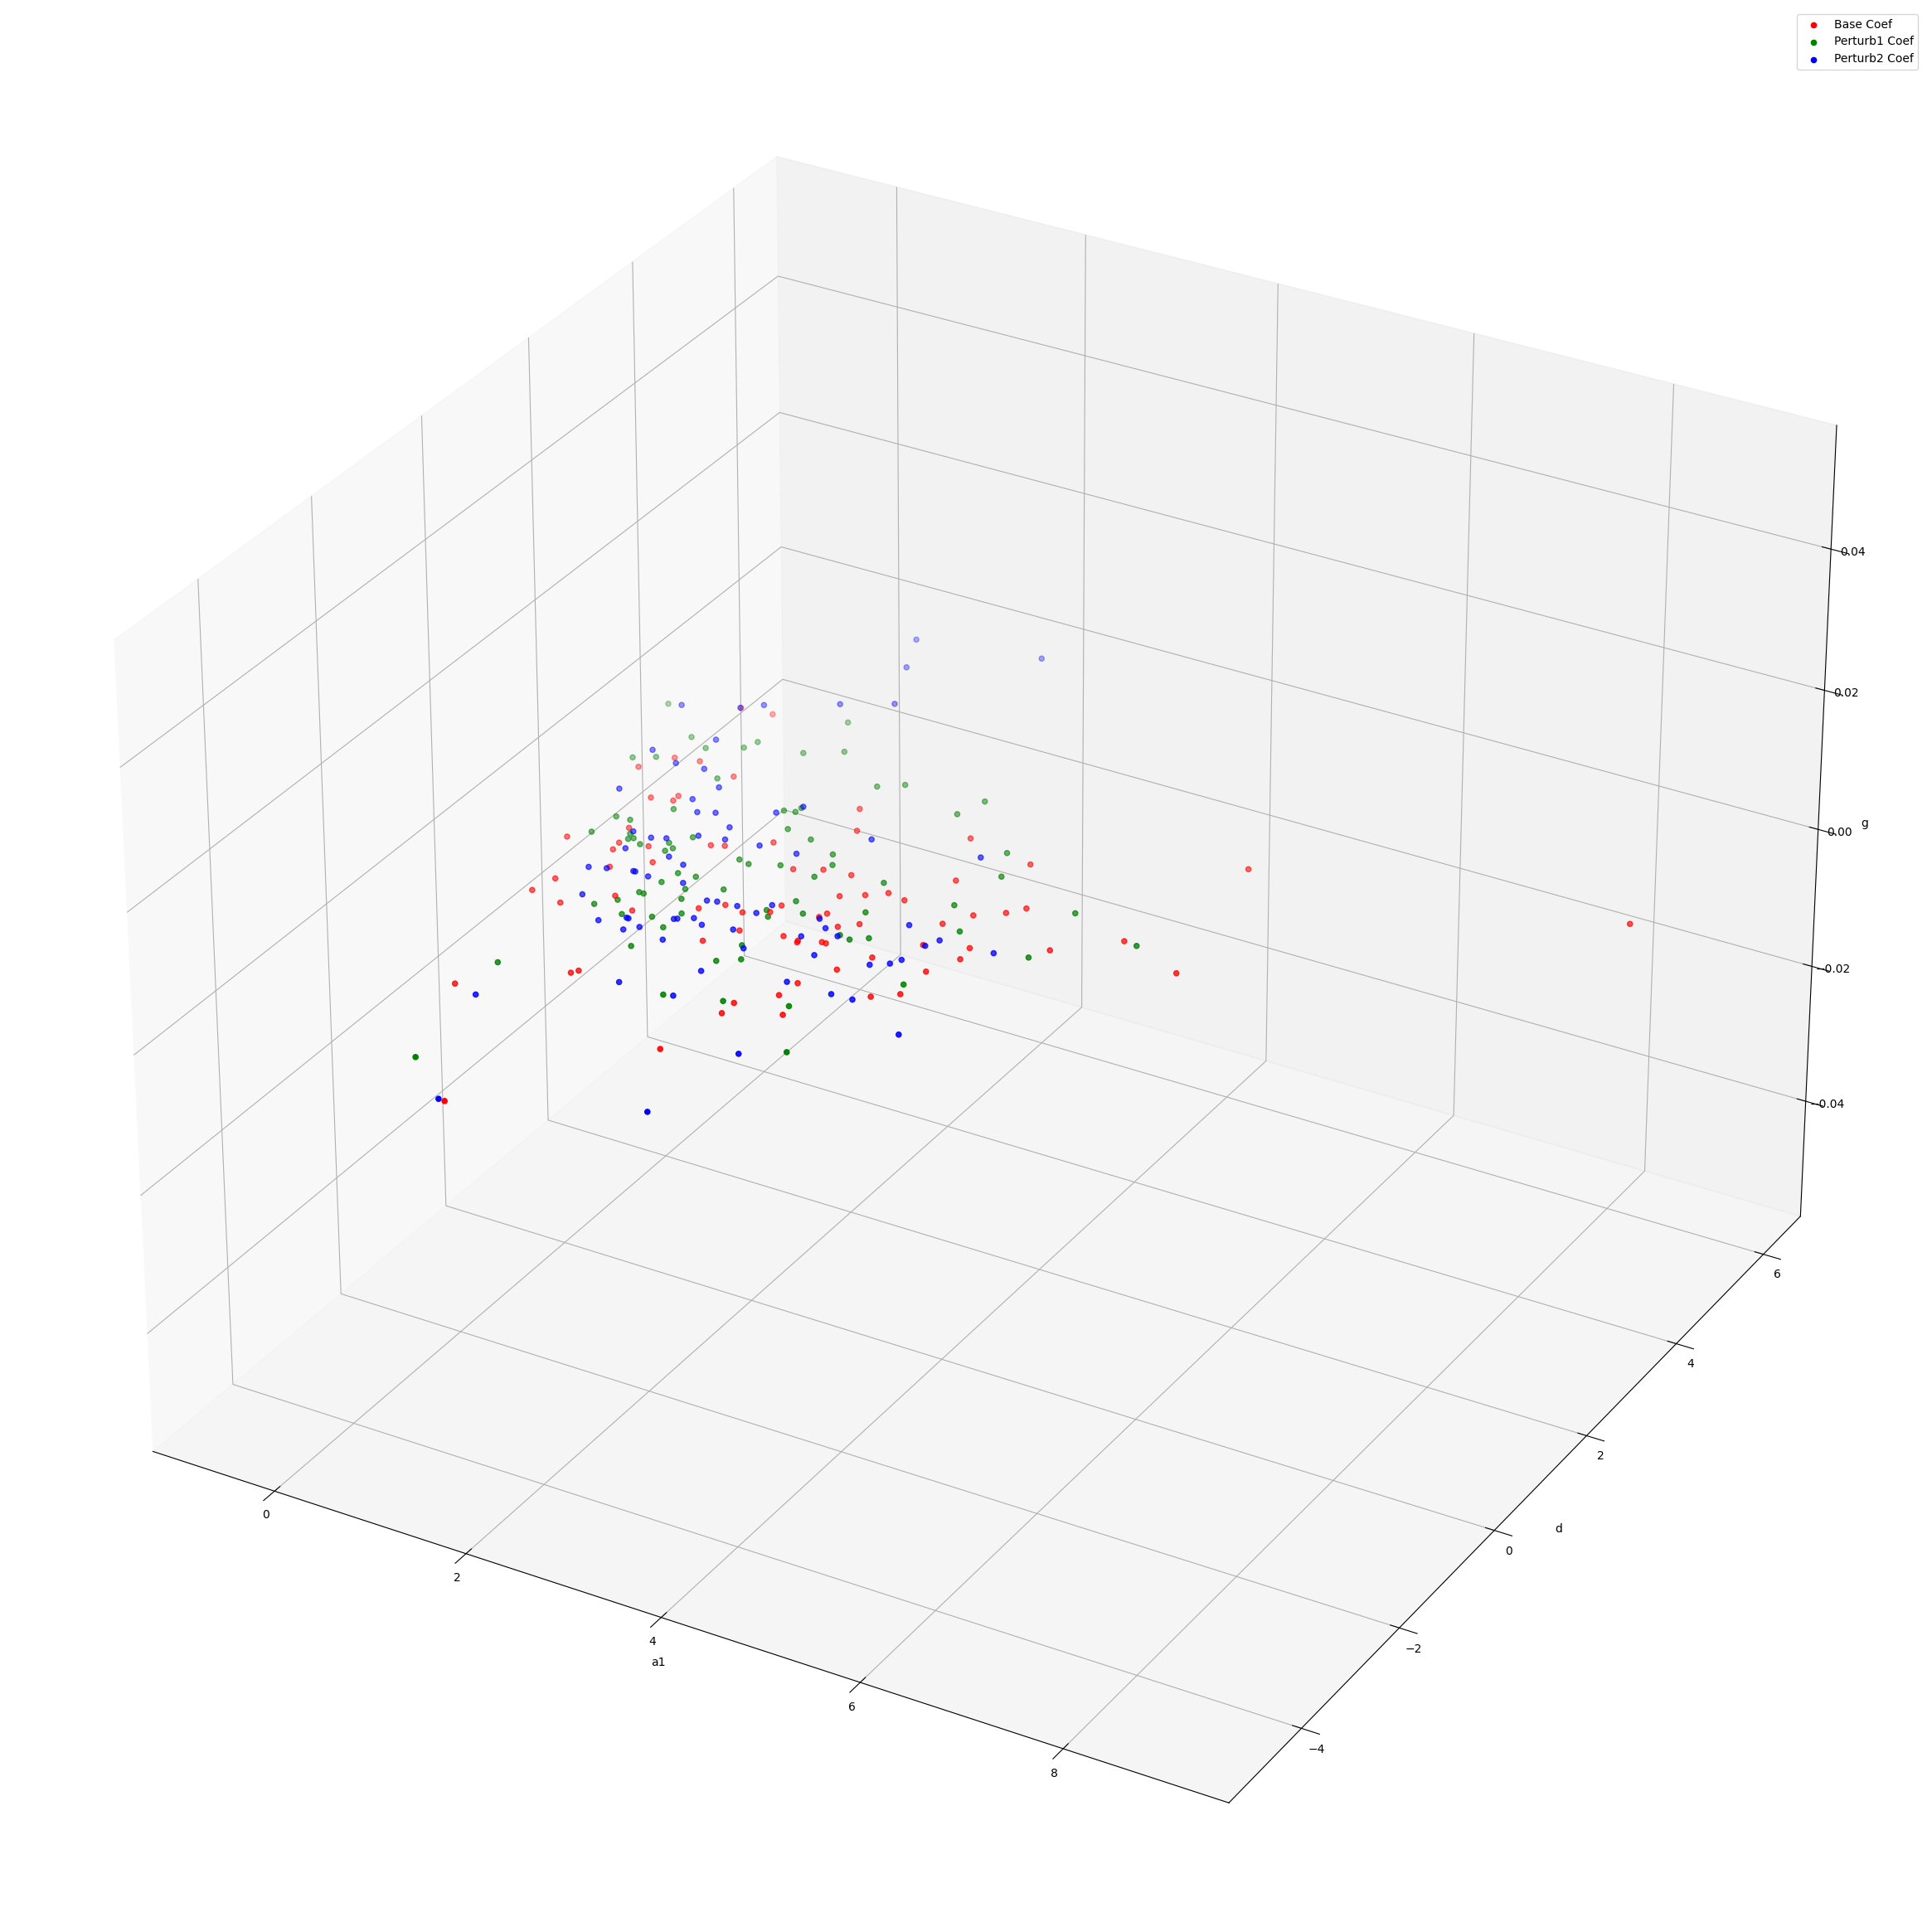

3PL


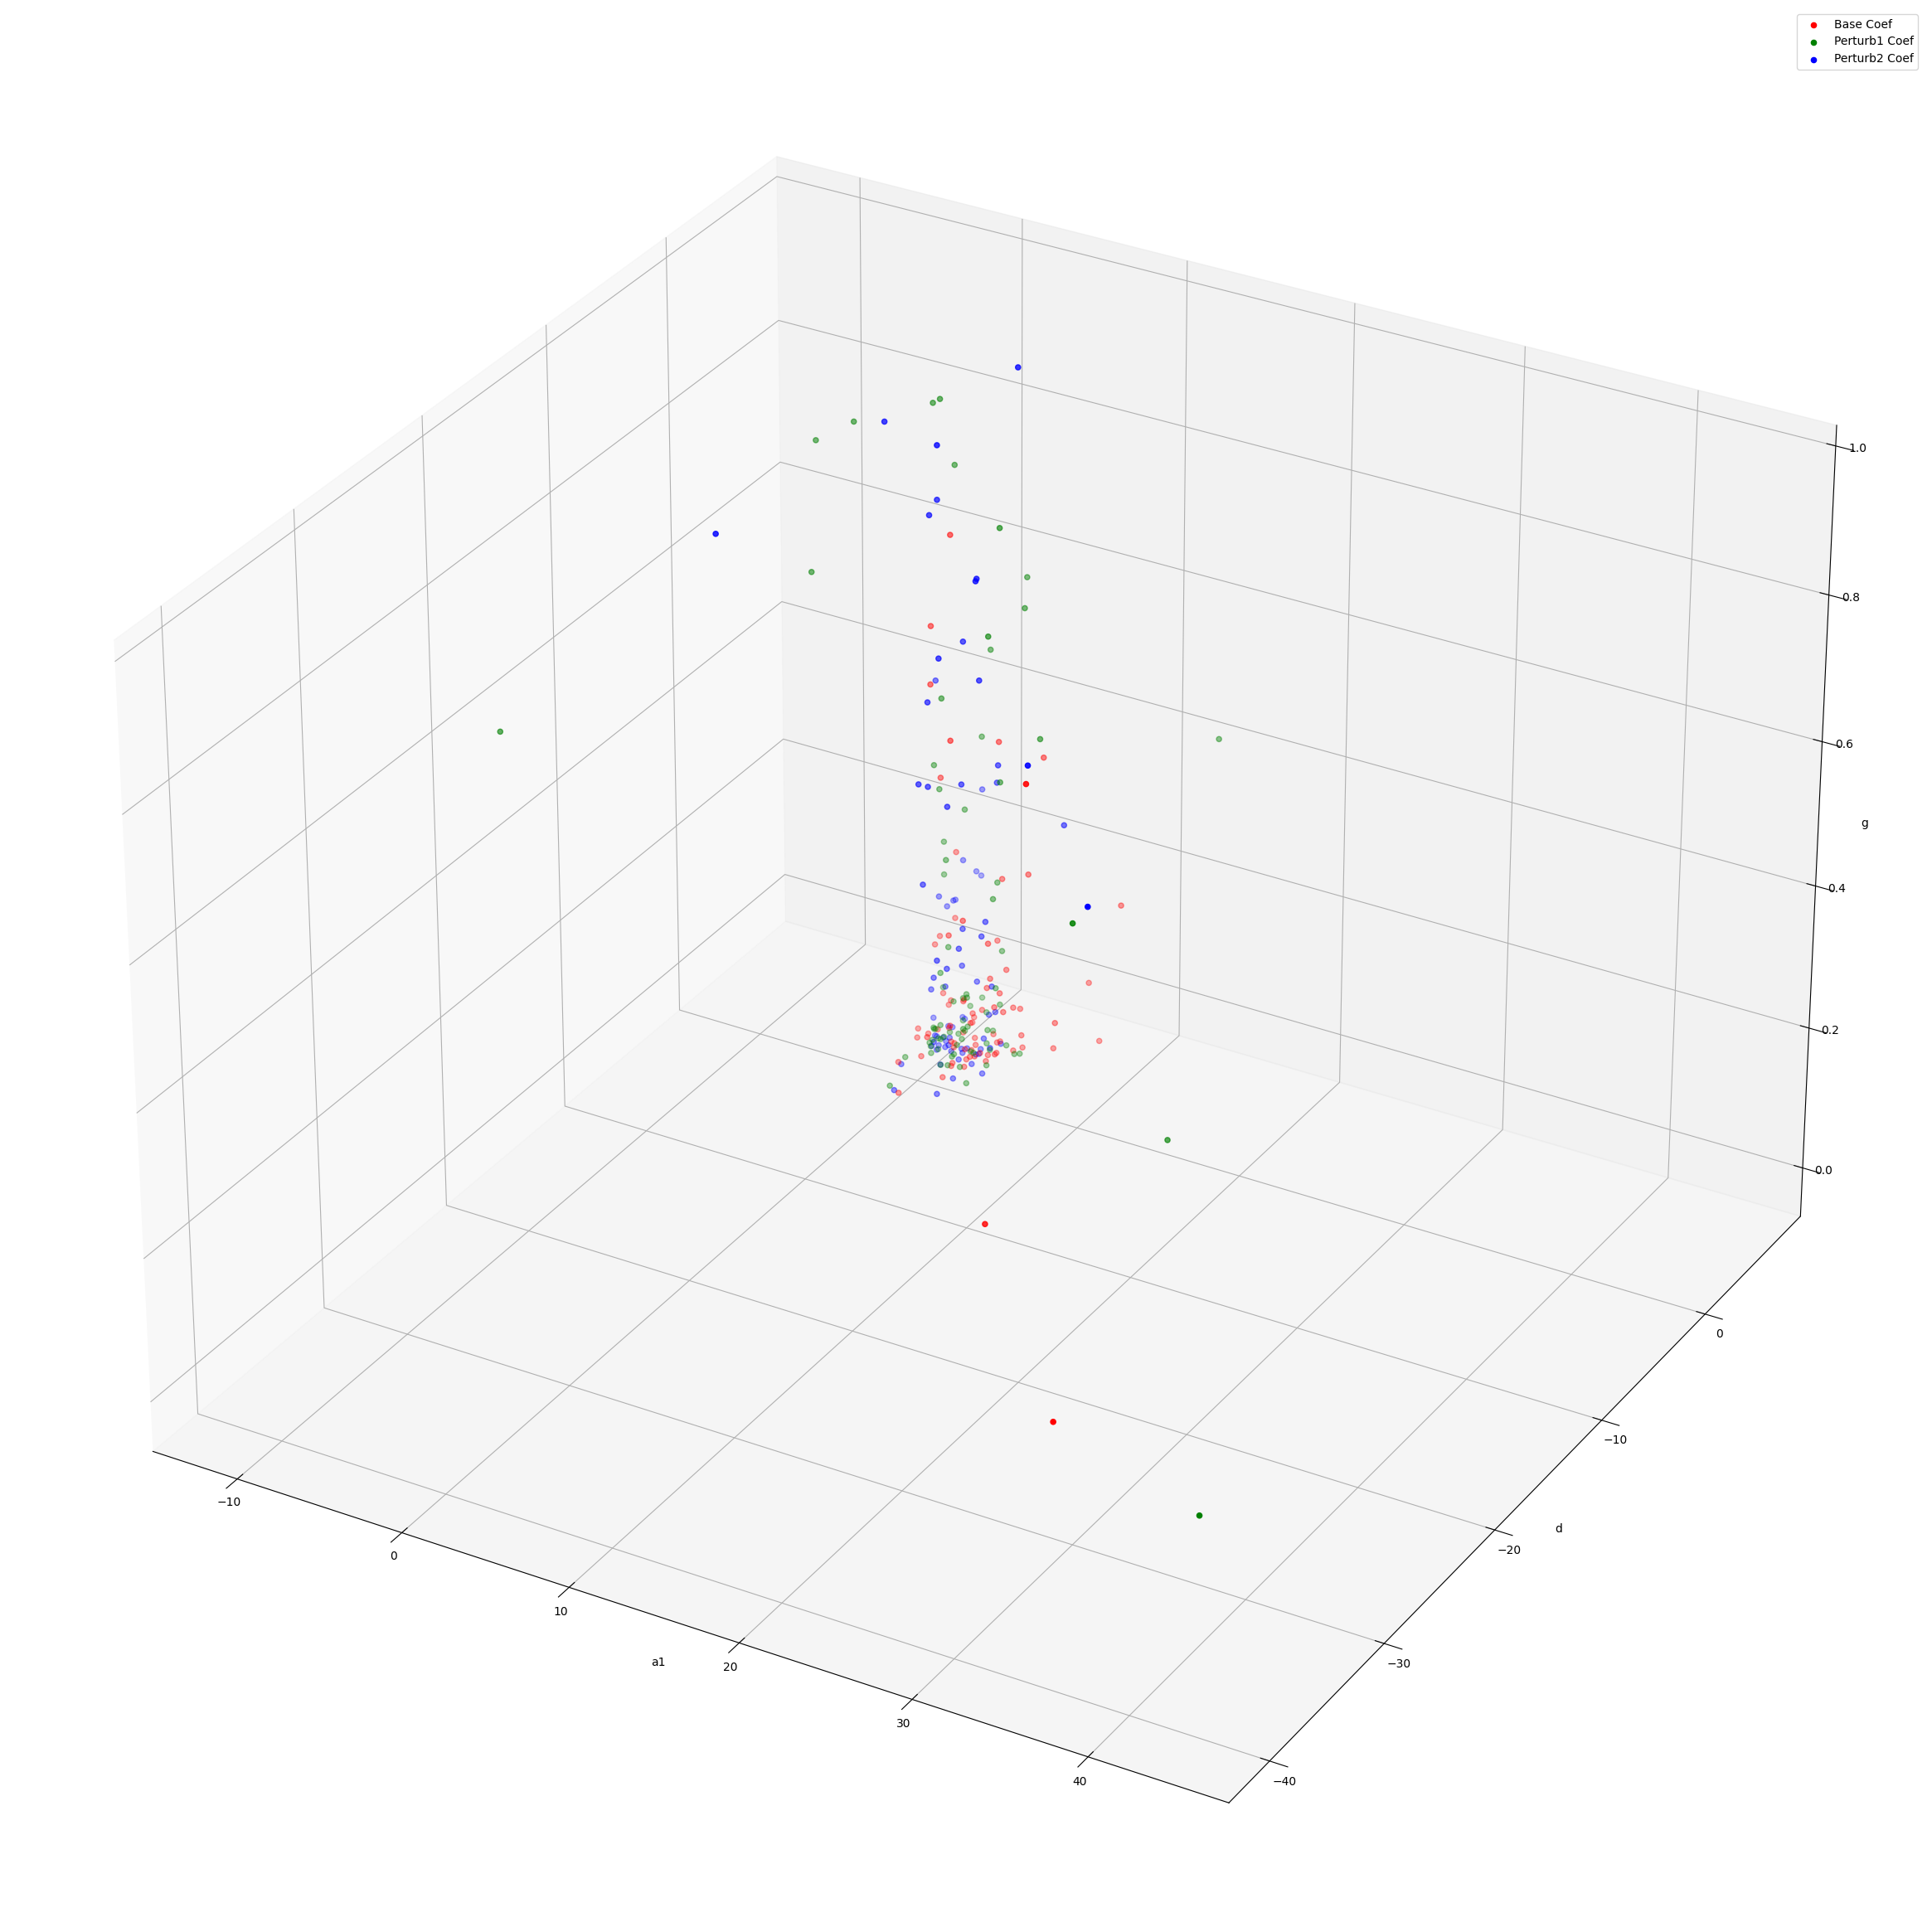

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

model_list = ['1PL', '2PL', '3PL']

for model_name in model_list:
    print(model_name)

    base_coef = pd.read_csv(f'model_coef/divided_base_coef_{model_name}_clean.csv', usecols=[0, 1, 2])
    perturb1_coef = pd.read_csv(f'model_coef/divided_perturb1_coef_{model_name}_clean.csv', usecols=[0, 1, 2])
    perturb2_coef = pd.read_csv(f'model_coef/divided_perturb2_coef_{model_name}_clean.csv', usecols=[0, 1, 2])

    fig = plt.figure(figsize=(30, 30))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(base_coef.iloc[:, 0], base_coef.iloc[:, 1], base_coef.iloc[:, 2], c='r', label='Base Coef')
    ax.scatter(perturb1_coef.iloc[:, 0], perturb1_coef.iloc[:, 1], perturb1_coef.iloc[:, 2], c='g', label='Perturb1 Coef')
    ax.scatter(perturb2_coef.iloc[:, 0], perturb2_coef.iloc[:, 1], perturb2_coef.iloc[:, 2], c='b', label='Perturb2 Coef')

    ax.set_xlabel('a1')
    ax.set_ylabel('d')
    ax.set_zlabel('g')

    # ax.set_xlim(-3, 3)
    # ax.set_ylim(-3, 3)
    # ax.set_zlim(-3, 3)

    ax.legend()
    plt.show()

1PL


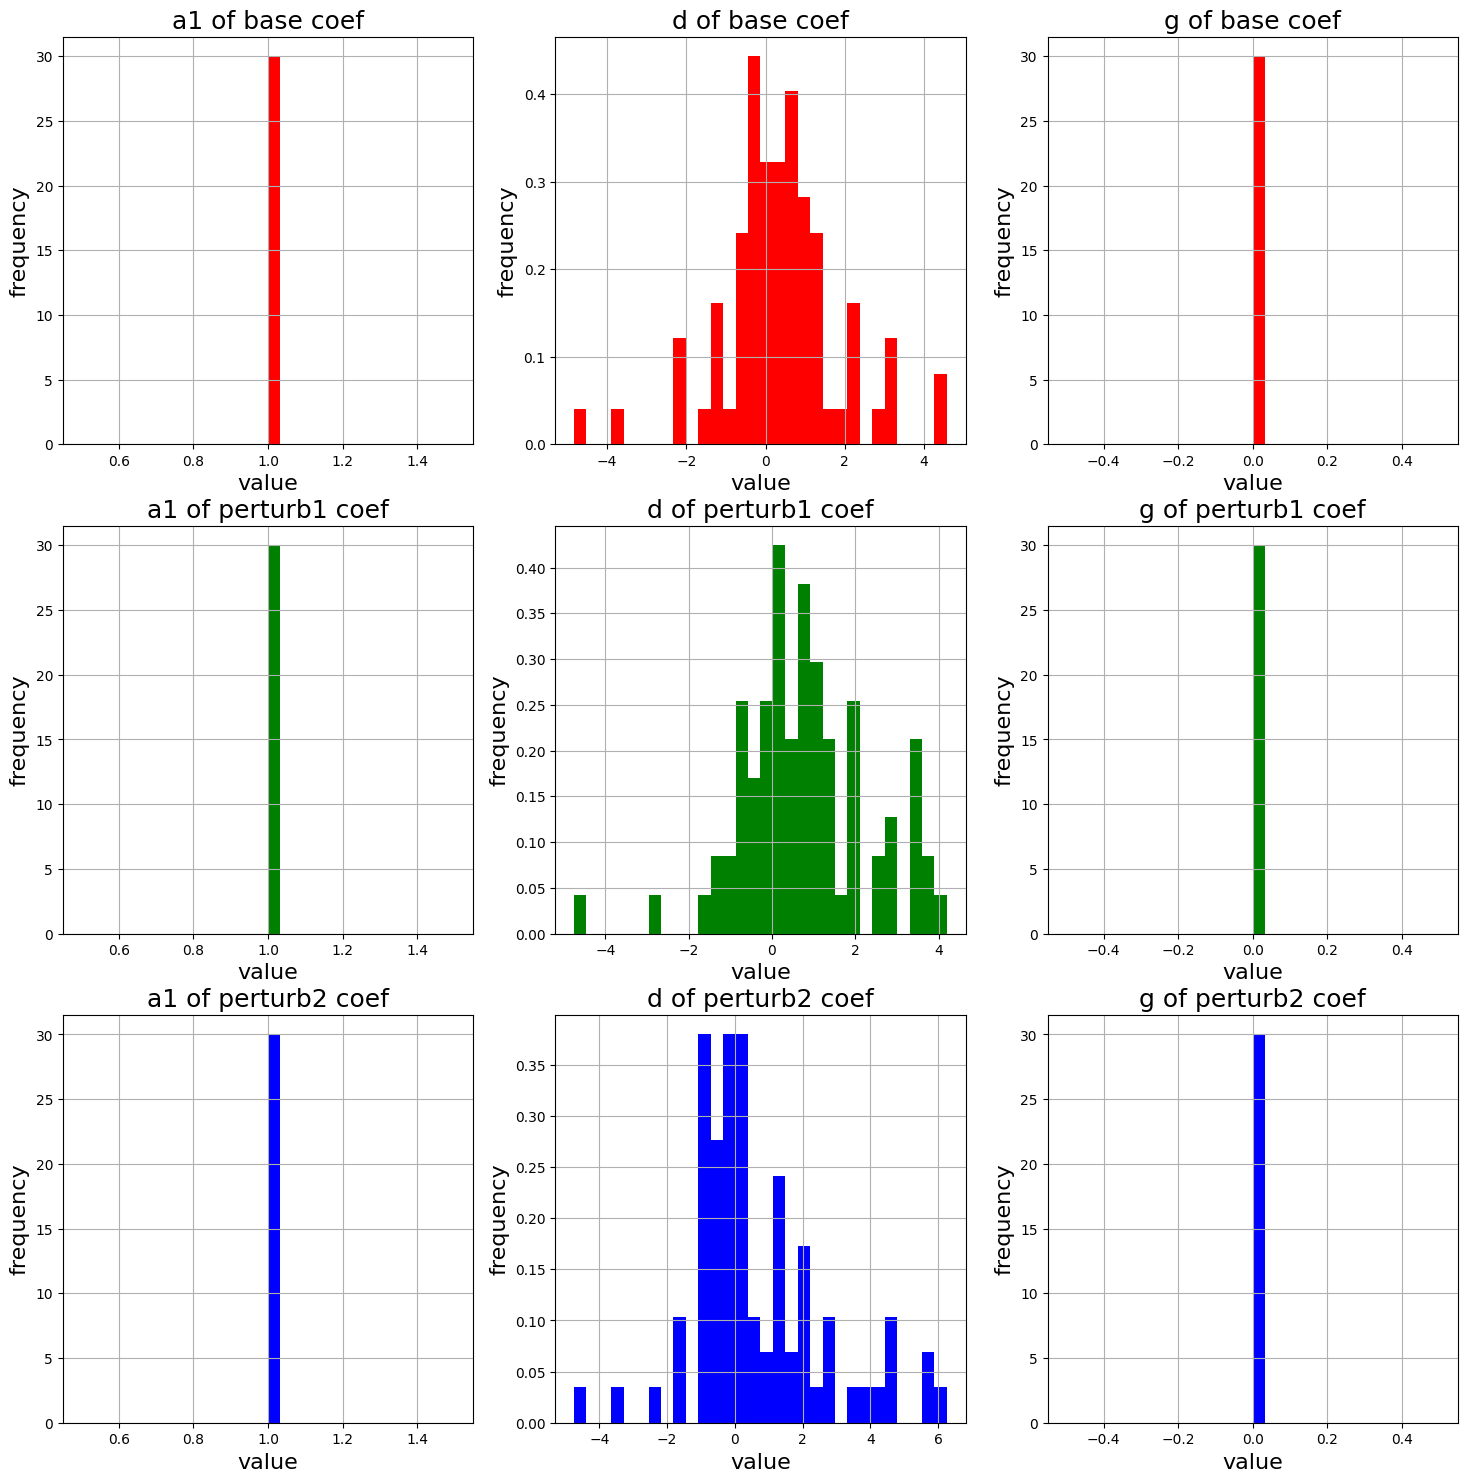

2PL


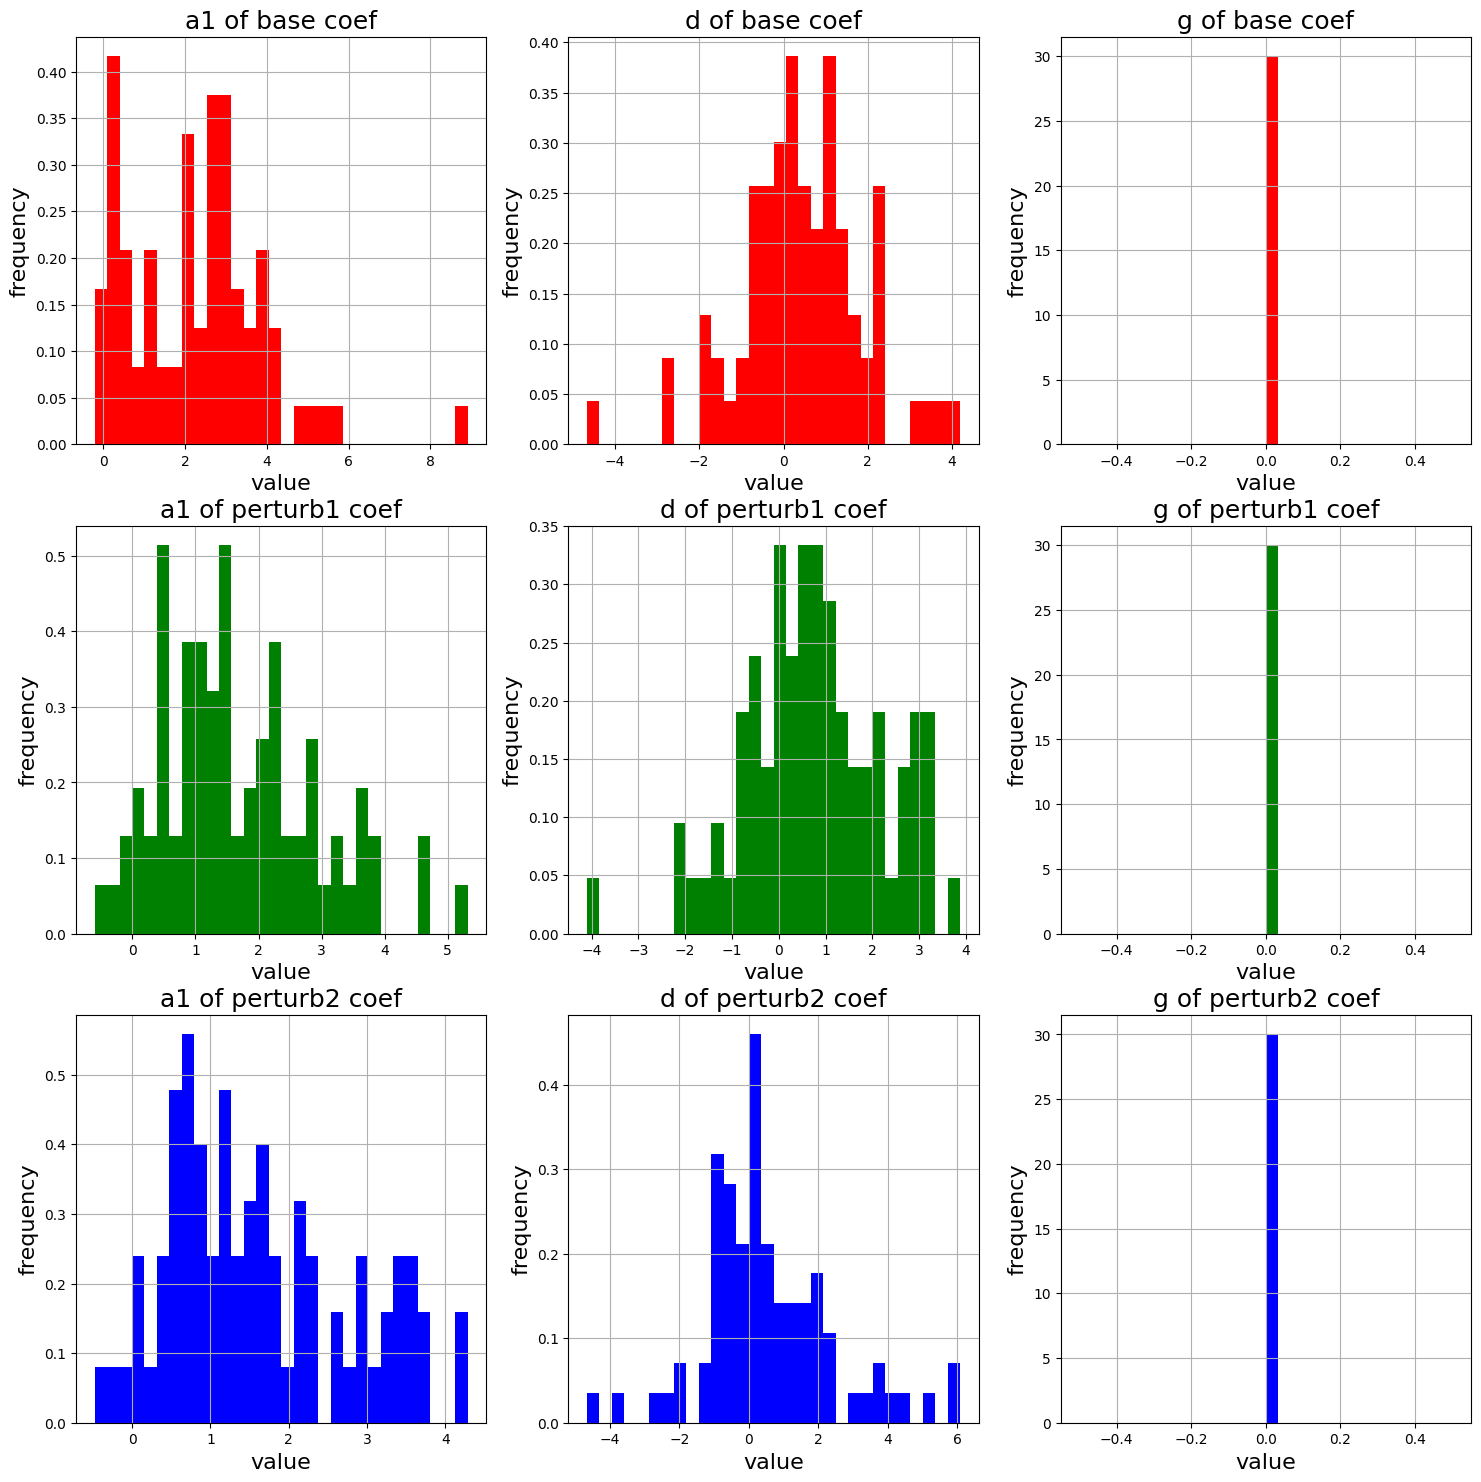

3PL


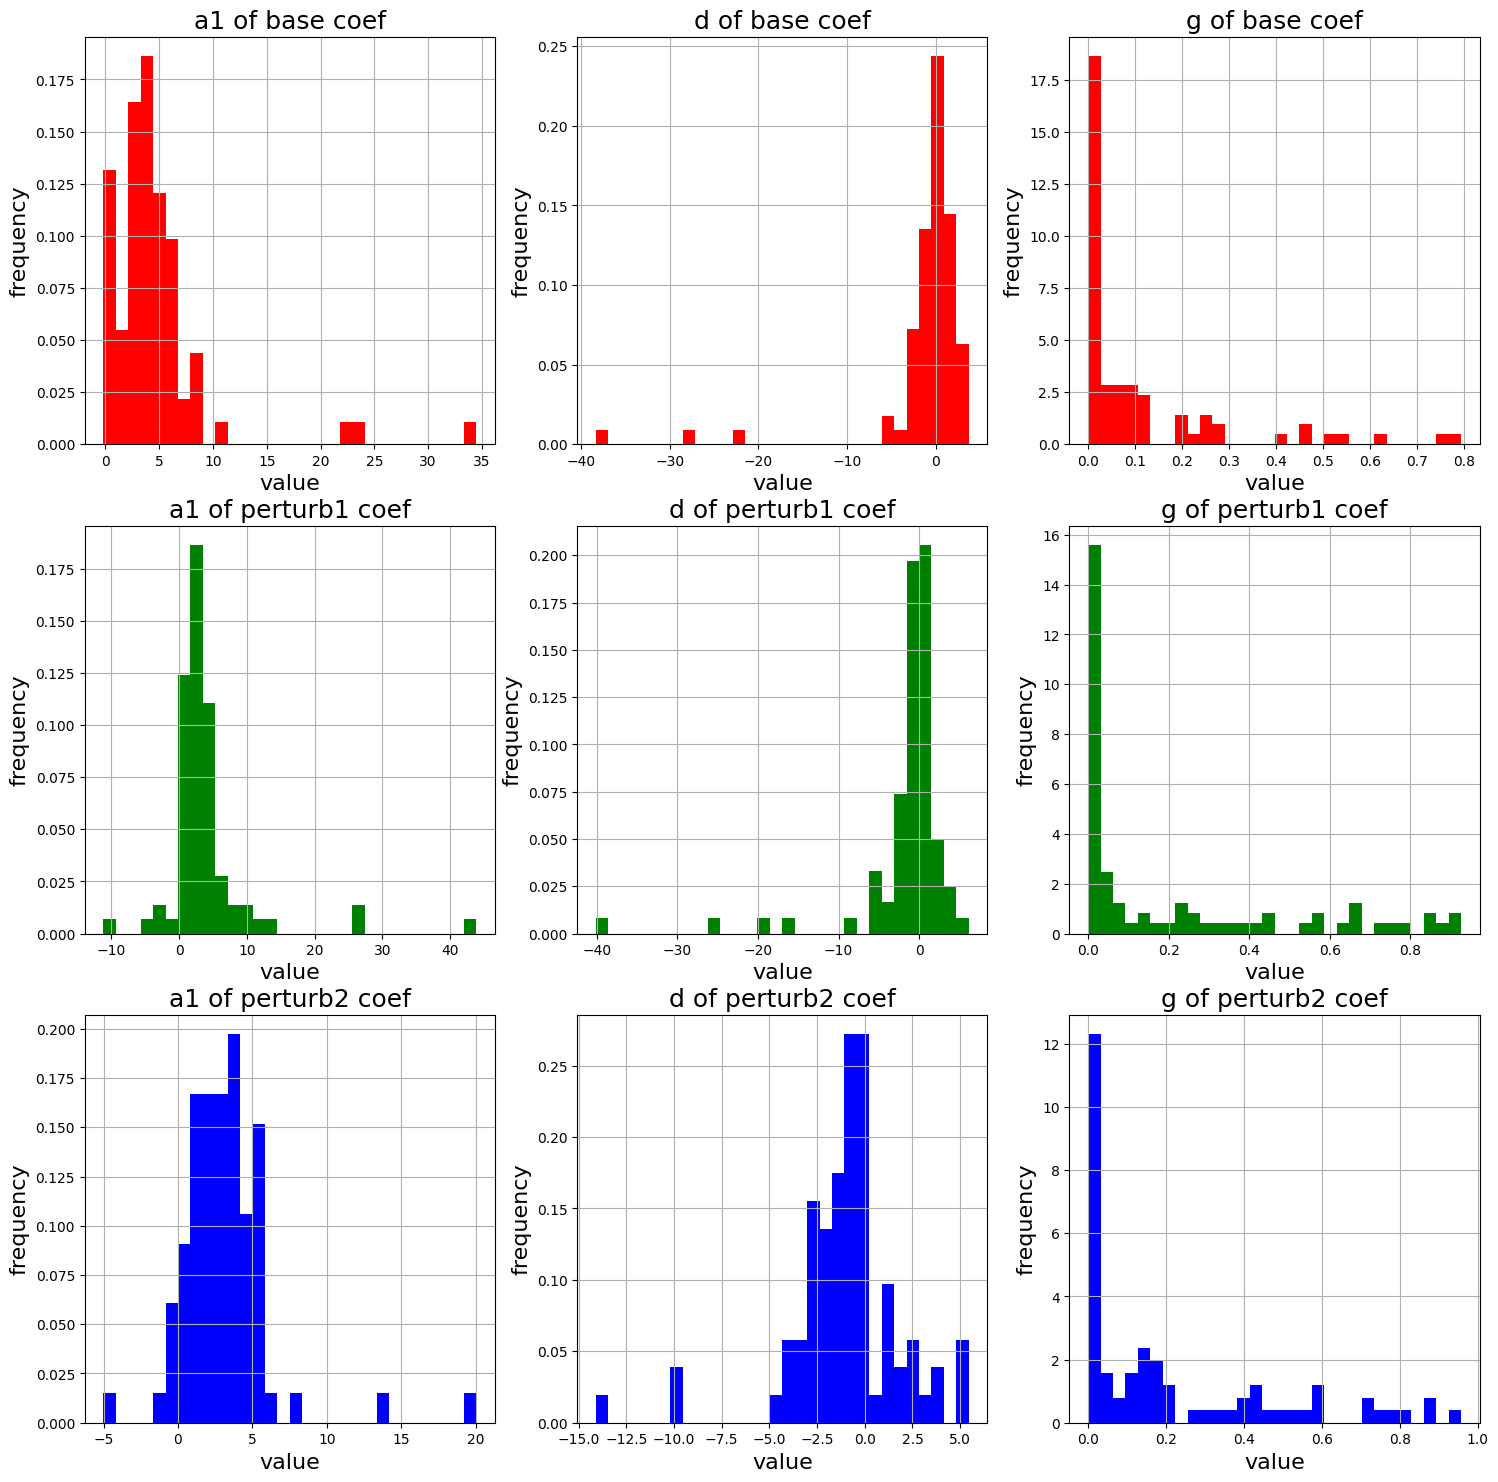

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# from tueplots import bundles
# bundles.icml2022()
# bundles.icml2022(family="sans-serif", usetex=False, column="full", nrows=2)
# plt.rcParams.update(bundles.icml2022())

for model_name in model_list:
    print(model_name)

    base_coef = pd.read_csv(f'model_coef/divided_base_coef_{model_name}_clean.csv', usecols=[0, 1, 2])
    perturb1_coef = pd.read_csv(f'model_coef/divided_perturb1_coef_{model_name}_clean.csv', usecols=[0, 1, 2])
    perturb2_coef = pd.read_csv(f'model_coef/divided_perturb2_coef_{model_name}_clean.csv', usecols=[0, 1, 2])

    base_value = [base_coef.iloc[:, i] for i in range(3)]
    perturb1_value = [perturb1_coef.iloc[:, i] for i in range(3)]
    perturb2_value = [perturb2_coef.iloc[:, i] for i in range(3)]

    plt.figure(figsize=(18, 18))

    def plot_hist(serial, data, color, para, perturb):
        plt.subplot(3, 3, serial)
        plt.hist(data, bins=30, color=color, density=True)
        plt.xlabel('value', fontsize=16)
        plt.ylabel('frequency', fontsize=16)
        plt.title(f'{para} of {perturb} coef', fontsize=18)
        plt.grid(True)

    plot_hist(1, base_value[0], 'r', 'a1', 'base')
    plot_hist(2, base_value[1], 'r', 'd', 'base')
    plot_hist(3, base_value[2], 'r', 'g', 'base')   

    plot_hist(4, perturb1_value[0], 'g', 'a1', 'perturb1')
    plot_hist(5, perturb1_value[1], 'g', 'd', 'perturb1')
    plot_hist(6, perturb1_value[2], 'g', 'g', 'perturb1')   

    plot_hist(7, perturb2_value[0], 'b', 'a1', 'perturb2')
    plot_hist(8, perturb2_value[1], 'b', 'd', 'perturb2')
    plot_hist(9, perturb2_value[2], 'b', 'g', 'perturb2')   

    plt.show()

# Wasserstein Distance

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance

def calculate_wasserstein_dist(vector1, vector2, vector3, bins=30):
    hist1, bin_edges1 = np.histogram(vector1, bins=bins, density=True)
    hist2, bin_edges2 = np.histogram(vector2, bins=bins, density=True)
    hist3, bin_edges3 = np.histogram(vector3, bins=bins, density=True)

    bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
    bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
    
    distance_1_2 = wasserstein_distance(bin_centers1, bin_centers2, u_weights=hist1, v_weights=hist2)
    distance_1_3 = wasserstein_distance(bin_centers1, bin_centers3, u_weights=hist1, v_weights=hist3)
    distance_2_3 = wasserstein_distance(bin_centers2, bin_centers3, u_weights=hist2, v_weights=hist3)

    return distance_1_2, distance_1_3, distance_2_3

def load_coef_and_calculate_dist(model, columns):
    base_coef = pd.read_csv(f'model_coef/divided_base_coef_{model}_clean.csv', usecols=columns)
    perturb1_coef = pd.read_csv(f'model_coef/divided_perturb1_coef_{model}_clean.csv', usecols=columns)
    perturb2_coef = pd.read_csv(f'model_coef/divided_perturb2_coef_{model}_clean.csv', usecols=columns)
    
    distances_list = []
    
    for column in columns:
        base_value = base_coef[column]
        perturb1_value = perturb1_coef[column]
        perturb2_value = perturb2_coef[column]
        
        distances = calculate_wasserstein_dist(base_value, perturb1_value, perturb2_value)
        distances_list.append((column, distances))
    
    return distances_list

models = {
    '1PL': ["d"],
    '2PL': ["a1", "d"],
    '3PL': ["a1", "d", "g"]
}

for model, columns in models.items():
    distances = load_coef_and_calculate_dist(model, columns)
    for column, dist in distances:
        print(f"{model} Wasserstein Distances of {column}:", dist)

1PL Wasserstein Distances of d: (0.4396220668488068, 0.4925852613373949, 0.4382131893663497)
2PL Wasserstein Distances of a1: (0.6233532843258084, 0.7047291581080546, 0.13432927050242835)
2PL Wasserstein Distances of d: (0.3551952361763406, 0.3710233713654477, 0.4825463865228038)
3PL Wasserstein Distances of a1: (1.4066463537388458, 1.5409308458839912, 1.6695404313081175)
3PL Wasserstein Distances of d: (1.0939685257010319, 1.5375367269614117, 1.4974527844068484)
3PL Wasserstein Distances of g: (0.09787602982189618, 0.10539262575180289, 0.028952786883655983)


# 3D Wasserstein Distance

In [12]:
import pandas as pd
import ot
import scipy as sp

# https://pythonot.github.io/auto_examples/gromov/plot_gromov.html
def calculate_3d_wasserstein_dist(matrix1, matrix2, n_samples):
    C1 = sp.spatial.distance.cdist(matrix1, matrix1)
    C2 = sp.spatial.distance.cdist(matrix2, matrix2)

    C1 /= C1.max()
    C2 /= C2.max()
    
    p = ot.unif(n_samples)
    q = ot.unif(n_samples)

    # Conditional Gradient algorithm
    gw0, log0 = ot.gromov.gromov_wasserstein(
        C1, C2, p, q, 'square_loss', verbose=True, log=True)
    
    return str(log0['gw_dist'])

model_list = ['1PL', '2PL', '3PL']
with open('3D_Wasserstein_Distance.txt', 'w') as f:
    for model_name in model_list:
        f.write(f'{model_name}\n')
        
        base_matrix = pd.read_csv(f'model_coef/divided_base_coef_{model_name}_clean.csv', usecols=[0, 1, 2]).values
        perturb1_matrix = pd.read_csv(f'model_coef/divided_perturb1_coef_{model_name}_clean.csv', usecols=[0, 1, 2]).values
        perturb2_matrix = pd.read_csv(f'model_coef/divided_perturb2_coef_{model_name}_clean.csv', usecols=[0, 1, 2]).values
        
        n_samples = base_matrix.shape[0]
        f.write(f'{n_samples}\n')
        
        distance_1_2 = calculate_3d_wasserstein_dist(base_matrix, perturb1_matrix, n_samples)
        distance_1_3 = calculate_3d_wasserstein_dist(base_matrix, perturb2_matrix, n_samples)
        distance_2_3 = calculate_3d_wasserstein_dist(perturb1_matrix, perturb2_matrix, n_samples)
        
        f.write(f'Distance between base_matrix and perturb1_matrix: {distance_1_2}\n')
        f.write(f'Distance between base_matrix and perturb2_matrix: {distance_1_3}\n')
        f.write(f'Distance between perturb1_matrix and perturb2_matrix: {distance_2_3}\n')

It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|4.703207e-02|0.000000e+00|0.000000e+00
    1|1.562020e-02|2.010977e+00|3.141187e-02
    2|5.726039e-03|1.727924e+00|9.894162e-03
    3|2.417347e-03|1.368728e+00|3.308692e-03
    4|2.417347e-03|0.000000e+00|0.000000e+00
It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|5.119942e-02|0.000000e+00|0.000000e+00
    1|1.515904e-02|2.377486e+00|3.604039e-02
    2|1.410618e-02|7.463755e-02|1.052851e-03
    3|1.340172e-02|5.256512e-02|7.044631e-04
    4|1.149943e-02|1.654252e-01|1.902295e-03
    5|6.291536e-03|8.277614e-01|5.207890e-03
    6|3.703553e-03|6.987840e-01|2.587983e-03
    7|3.703553e-03|2.341972e-16|8.673617e-19
It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|5.160639e-02|0.000000e+00|0.000000e+00
    1|1.541083e-02|2.348709e+00|3.619556e-02
    2|2.638149e-03|4.841533e+00|1.277